This FuXiang Chen's homework. I getting rid of many explanation on the class so that it's is easier for grading.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')
!wget -P solutions https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/sandpile.py

Directory "solutions" already exists. Skipping creation.


'wget' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [62]:
class AbelianSandpile:
    def __init__(self, n=100, random_state=None):
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
        self.modgrid = np.zeros((n+2,n+2))
        self.history =[self.grid.copy()] # Why did we need to copy the grid?

    def step(self):
        sandx,sandy =np.random.randint(1,self.n,2)
        self.modgrid[1:-1,1:-1] = self.grid.copy()
        self.modgrid[sandx,sandy] +=1
        
        #print(self.grid)
        def collapse(x,y):
            if (self.modgrid[x,y]>3):
                self.modgrid[x,y] = self.modgrid[x,y]-4
        
                self.modgrid[x,y+1] +=1
                self.modgrid[x+1,y] +=1
                self.modgrid[x,y-1] +=1
                self.modgrid[x-1,y] +=1

                self.modgrid [0,:] *= 0
                self.modgrid [:,0] *= 0
                self.modgrid [-1,:] *= 0
                self.modgrid [:,-1] *= 0
                collapse(x,y+1)
                collapse(x,y-1)
                collapse(x+1,y)
                collapse(x-1,y)
            else:
                #print("equalibrium")
                return 0
        if (self.modgrid[sandx,sandy]>3):
            #print(self.modgrid)
            collapse(sandx,sandy)
        #print("drop sand")
        self.grid = self.modgrid[1:-1,1:-1].copy()
        self.history.append(self.grid.copy())
        
    
 
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)
    def simulate(self, n_step):
        for i in range (n_step):
            self.step()

Text(0.5, 1.0, 'Avalanche activity in most recent timesteps')

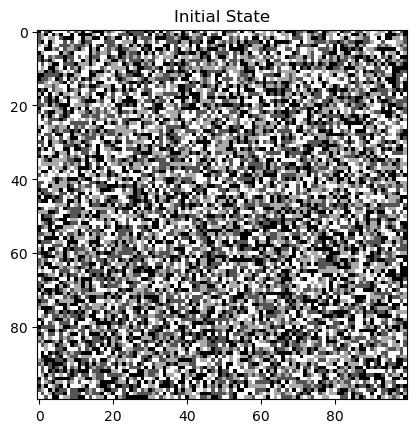

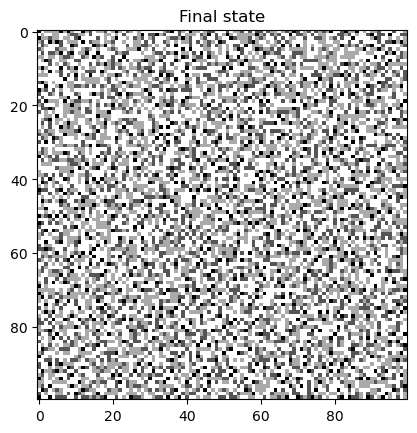

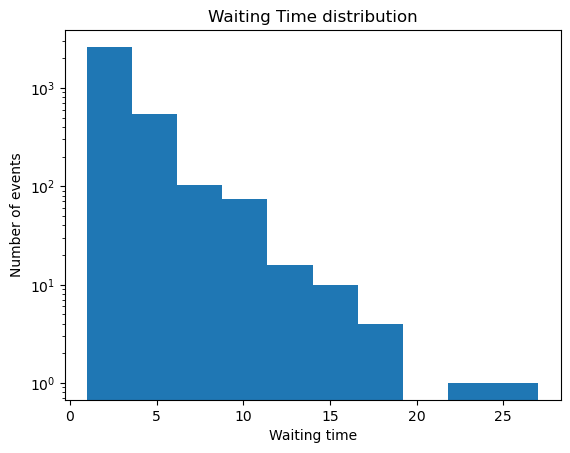

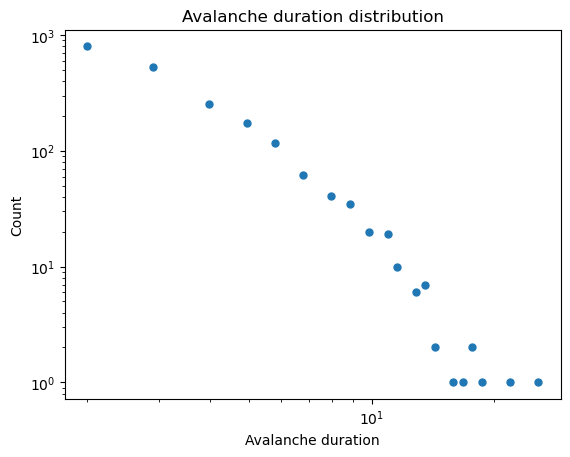

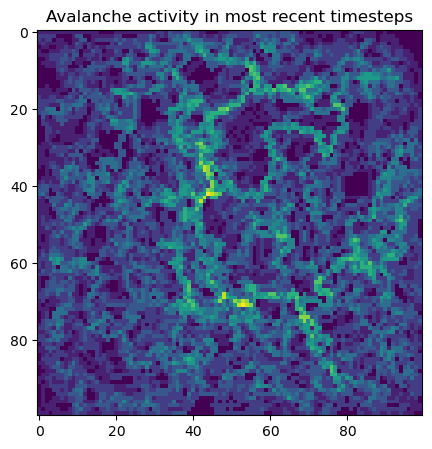

In [63]:
## Import William's solution from answer key
# from solutions.sandpile import AbelianSandpileIterative as AbelianSandpile
# from solutions.sandpile import AbelianSandpileBFS as AbelianSandpile
# from solutions.sandpile import AbelianSandpileDFS as AbelianSandpile


# Run sandpile simulation
model = AbelianSandpile(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Initial State")

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


## Waiting time distribution
waiting_times = np.diff(np.array(all_avalanche_times))
plt.figure()
plt.semilogy()
plt.hist(waiting_times)
plt.title('Waiting Time distribution')
plt.xlabel('Waiting time')
plt.ylabel('Number of events')

## Duration distribution
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanche activity in most recent timesteps")

Answer 1 and 2 are shown in first 2 figures
